<a href="https://colab.research.google.com/github/irfanmd38/-Loan-Status-Prediction-using-Machine-Learning-/blob/main/ML-Project-Loan-Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loan Status Prediction using Machine Learning with Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
loan_dataset = pd.read_csv("/content/content.csv")

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [8]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-3950240672.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [9]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [10]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [11]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [12]:
# dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
4,51


In [13]:
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [14]:
# dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
4,51


In [ ]:
#Data Visualization

<Axes: xlabel='Education', ylabel='count'>

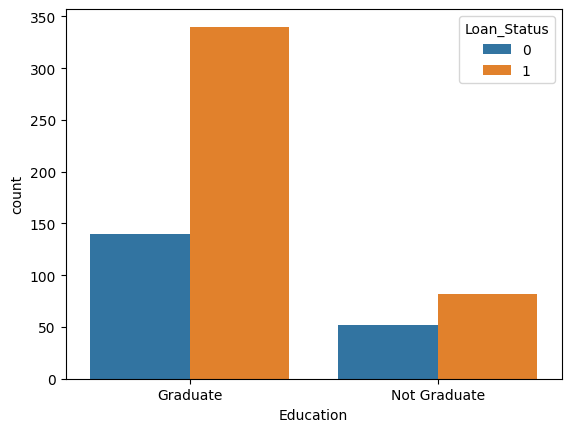

In [15]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

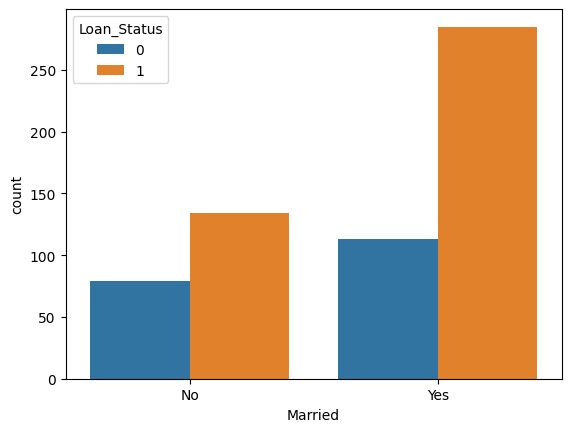

In [16]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [17]:
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

/tmp/ipython-input-3833866335.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [18]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [19]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [20]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0          0          1            0.0             5849   
1       1.0      1.0          1          1            0.0             4583   
2       1.0      1.0          0          1            1.0             3000   
3       1.0      1.0          0          0            0.0             2583   
4       1.0      0.0          0          1            0.0             6000   
..      ...      ...        ...        ...            ...              ...   
609     0.0      0.0          0          1            0.0             2900   
610     1.0      1.0          4          1            0.0             4106   
611     1.0      1.0          1          1            0.0             8072   
612     1.0      1.0          2          1            0.0             7583   
613     0.0      0.0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
#Train Test Split

In [21]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


In [ ]:
#Training the model:

#Support Vector Machine Model

In [23]:
classifier = svm.SVC(kernel='linear')

In [24]:
# Impute numerical columns with the mean of the training set
X_train['LoanAmount'].fillna(X_train['LoanAmount'].mean(), inplace=True)
X_test['LoanAmount'].fillna(X_train['LoanAmount'].mean(), inplace=True)
X_train['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].mean(), inplace=True)
X_test['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].mean(), inplace=True)

# Impute categorical/binary columns with the mode of the training set
X_train['Gender'].fillna(X_train['Gender'].mode()[0], inplace=True)
X_test['Gender'].fillna(X_train['Gender'].mode()[0], inplace=True)
X_train['Married'].fillna(X_train['Married'].mode()[0], inplace=True)
X_test['Married'].fillna(X_train['Married'].mode()[0], inplace=True)
X_train['Dependents'].fillna(X_train['Dependents'].mode()[0], inplace=True)
X_test['Dependents'].fillna(X_train['Dependents'].mode()[0], inplace=True)
X_train['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0], inplace=True)
X_test['Self_Employed'].fillna(X_train['Self_Employed'].mode()[0], inplace=True)
X_train['Credit_History'].fillna(X_train['Credit_History'].mode()[0], inplace=True)
X_test['Credit_History'].fillna(X_train['Credit_History'].mode()[0], inplace=True)

print("Missing values in X_train after imputation:")
print(X_train.isnull().sum())
print("\nMissing values in X_test after imputation:")
print(X_test.isnull().sum())

Missing values in X_train after imputation:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Missing values in X_test after imputation:
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


/tmp/ipython-input-1100554652.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['LoanAmount'].fillna(X_train['LoanAmount'].mean(), inplace=True)
/tmp/ipython-input-1100554652.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [25]:
# Training the Support Vector Machine model
classifier.fit(X_train, Y_train)

print("Model training complete!")

Model training complete!


In [ ]:
#Model Evaluation

In [28]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [29]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8115942028985508


In [ ]:
#Making a predictive system

In [30]:
new_applicant_data = {
    'Gender': 1,
    'Married': 0,
    'Dependents': 0,
    'Education': 1,
    'Self_Employed': 0,
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 0,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 2
}

# Convert the dictionary to a DataFrame, ensuring the column order matches X
new_applicant_df = pd.DataFrame([new_applicant_data], columns=X.columns)

print("New applicant data:")
print(new_applicant_df)

New applicant data:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0         150               360               1   

   Property_Area  
0              2  


In [31]:
prediction = classifier.predict(new_applicant_df)

In [32]:
if prediction[0] == 1:
    print('The predicted Loan Status is: Approved (1)')
else:
    print('The predicted Loan Status is: Not Approved (0)')

The predicted Loan Status is: Approved (1)
